# Zonal Dispatch Analysis

Create a "Scenario" Object with generators mapping to ISOs
Demonstrate various plotting capabilities

In [1]:
from marmot.scenariohandlers import SIIPScenario
import os
import pandas as pd
import marmot.quickplots as qp

# Object Inputs: Path to data, generator-entity map (json or dict), region-entity map (json or dict)
scenario_path = os.path.join(r"C:\Users\MWEBB\Downloads\NTPS Results","Aggregates")
gen_zone_path = os.path.normpath(r"C:\Users\MWEBB\Downloads\NTPS Results\mappings\gen_zone_map.json")
region_zone_path = os.path.normpath(r"C:\Users\MWEBB\Downloads\NTPS Results\mappings\region_zone_map.json")

ntps_scenario1_zone = SIIPScenario(scenario_path, gen_zone_path, region_zone_path)

df = ntps_scenario1_zone.get_entity_tech_load_aggregates()
df.head(2)

Unable to open map
Unable to open map


Entity                       FRCC                                          
Technology                Battery    Coal Curtailment        Demand  Gas   
DateTime                                                                   
2035-01-01 00:00:00  16327.188041  1497.0         0.0  24809.179514  0.0  \
2035-01-01 01:00:00   6557.993391  1497.0         0.0  23271.560855  0.0   

Entity                                                        ...   
Technology          Gas-CC Gas-CT Hydro Landfill-Gas Nuclear  ...   
DateTime                                                      ...   
2035-01-01 00:00:00    0.0    0.0  34.0          0.0  3724.3  ...  \
2035-01-01 01:00:00    0.0    0.0  34.0          0.0  3724.3  ...   

Entity              Saskatchewan                                               
Technology                  Coal Curtailment       Demand  Gas Gas-CC Gas-CT   
DateTime                                                                       
2035-01-01 00:00:00       1387.5         0.0  2487.594976  0.0  244.5    0.0  \
2035-01-01 01:00:00       1387.5         0.0  2394.219372  0.0    0.0    0.0   

Entity                                             
Technology           Hydro Other   PV        Wind  
DateTime                                           
2035-01-01 00:00:00  201.8   0.0  0.0  437.137724  
2035-01-01 01:00:00   14.0   0.0  0.0  437.137724  

[2 rows x 157 columns]

# Plotting

<Axes: title={'center': 'Entity - Annual Dispatch Stack'}, ylabel='Generation and Demand (TWh)'>

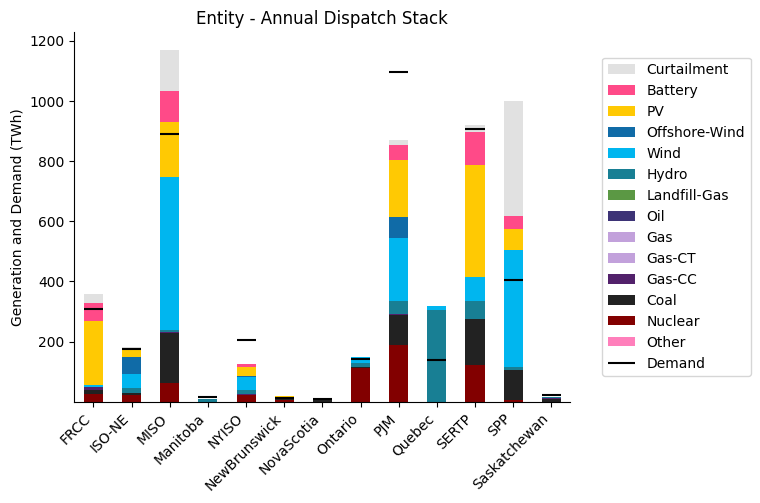

In [2]:
# Plots the sum of generation for each technology type and entity (zone/ISO)
# Plots a stacked bar for each unique entity in the "entity" column level
qp.plot_annual_entity_dispatch_stack(df)

Making subplots with PlottingHelpers

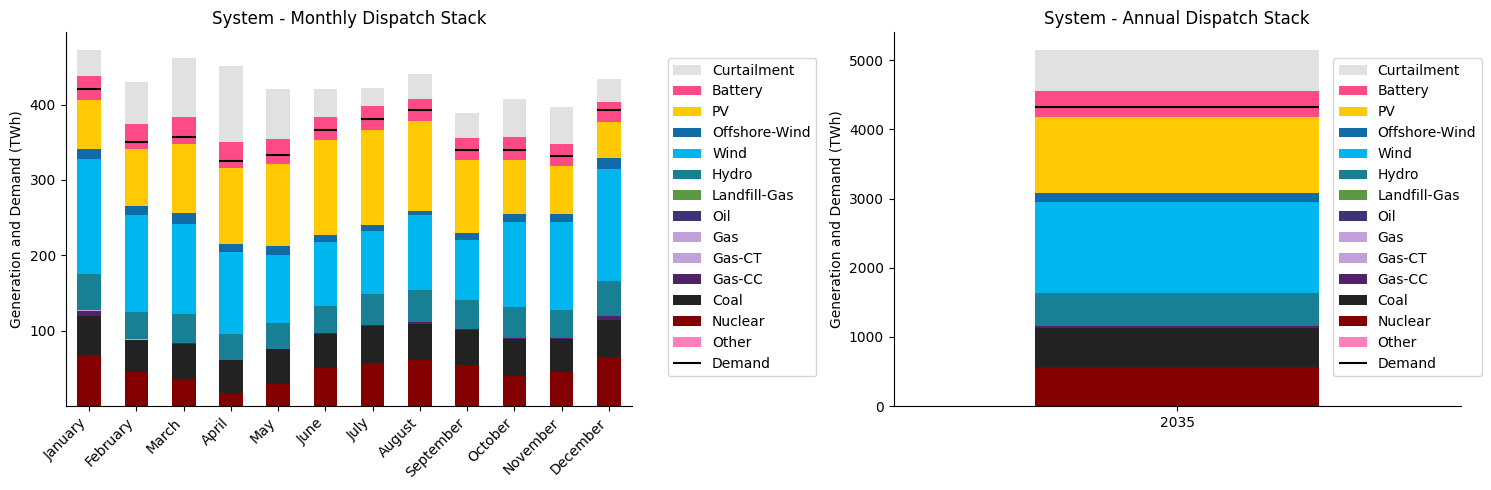

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0]= qp.plot_monthly_system_dispatch_stack(df, ax=axs[0]) # Plot Zonal Entity
axs[1]= qp.plot_annual_system_dispatch_stack(df, ax=axs[1]) # Plot 
plt.tight_layout()
plt.show()

Filtering data and calling PlottingHelpers.
In this case, our system is FRCC

Text(0.5, 1.0, 'CONUS - Annual Dispatch Stack')

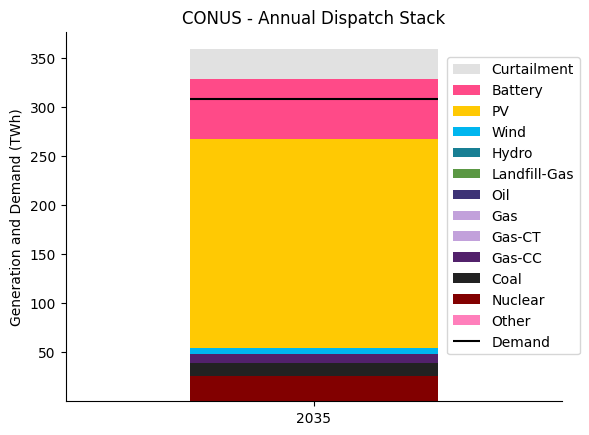

In [4]:
ax = qp.plot_annual_system_dispatch_stack(df[['FRCC']])
ax.set_title("CONUS - Annual Dispatch Stack")

Text(0.5, 1.0, 'CONUS - Monthly Dispatch Stack')

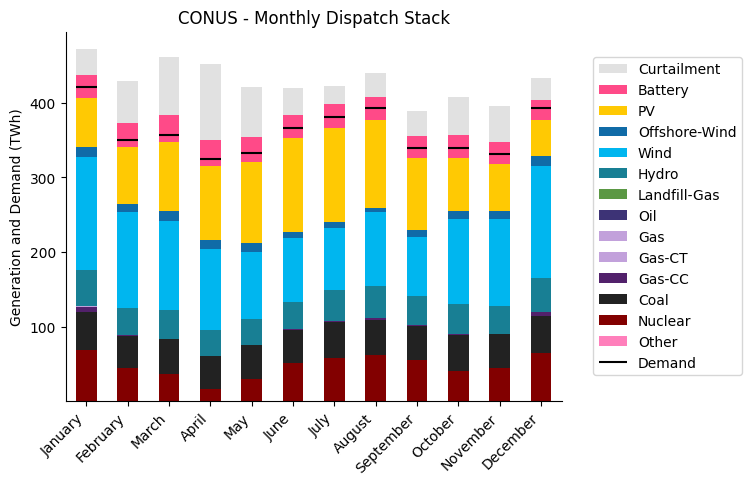

In [5]:
ax = qp.plot_monthly_system_dispatch_stack(df)
ax.set_title('CONUS - Monthly Dispatch Stack')

## Curtailment Plots

Getting curtailment by individual generator and plotting similar curtailment stacks.

In [6]:
curt = ntps_scenario1_zone.get_curtailment()
curt.head(2)

Technology                         Wind                       
Generator           generator-100092-N8 generator-100095-N8   
DateTime                                                      
2035-01-01 00:00:00                 0.0                 0.0  \
2035-01-01 01:00:00                 0.0                 0.0   

Technology                                                                     
Generator           generator-100351-1 generator-100352-2 generator-100353-3   
DateTime                                                                       
2035-01-01 00:00:00                0.0                0.0                0.0  \
2035-01-01 01:00:00                0.0                0.0                0.0   

Technology                                                                     
Generator           generator-100354-4 generator-100562-1 generator-100707-1   
DateTime                                                                       
2035-01-01 00:00:00                0.0                0.0                0.0  \
2035-01-01 01:00:00                0.0                0.0                0.0   

Technology                                                 ...   
Generator           generator-100708-2 generator-100716-1  ...   
DateTime                                                   ...   
2035-01-01 00:00:00                0.0                0.0  ...  \
2035-01-01 01:00:00                0.0                0.0  ...   

Technology                Offshore-Wind                       
Generator           generator-119194-N9 generator-123626-N9   
DateTime                                                      
2035-01-01 00:00:00                 0.0                 0.0  \
2035-01-01 01:00:00                 0.0                 0.0   

Technology                                                    
Generator           generator-123783-N9 generator-136155-N9   
DateTime                                                      
2035-01-01 00:00:00                 0.0                 0.0  \
2035-01-01 01:00:00                 0.0                 0.0   

Technology                                                    
Generator           generator-200012-N9 generator-200017-N9   
DateTime                                                      
2035-01-01 00:00:00                 0.0                 0.0  \
2035-01-01 01:00:00                 0.0                 0.0   

Technology                                                    
Generator           generator-200020-N9 generator-200029-N9   
DateTime                                                      
2035-01-01 00:00:00                 0.0                 0.0  \
2035-01-01 01:00:00                 0.0                 0.0   

Technology                                                   
Generator           generator-200063-N9 generator-314909-N9  
DateTime                                                     
2035-01-01 00:00:00                 0.0                 0.0  
2035-01-01 01:00:00                 0.0                 0.0  

[2 rows x 2984 columns]

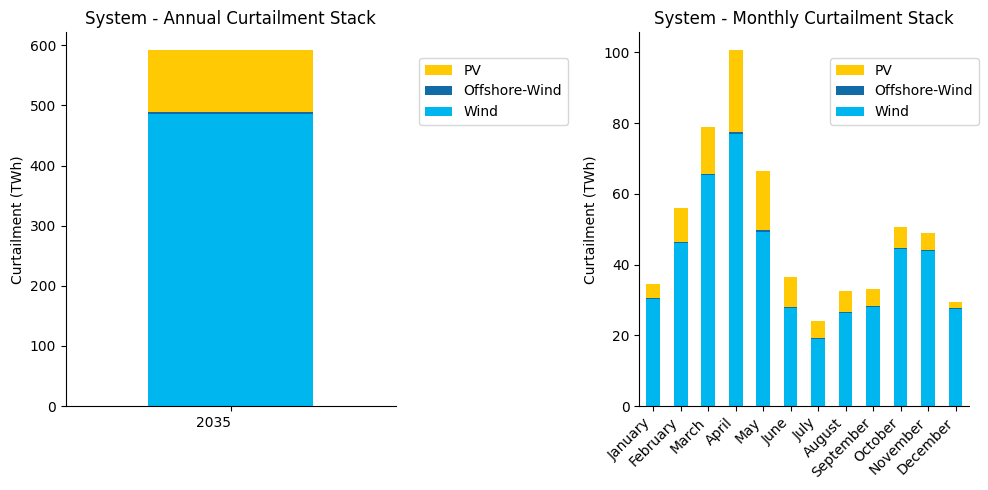

In [7]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0] = qp.plot_annual_system_curtailment_stack(curt, ax=axs[0])
axs[1] = qp.plot_monthly_system_curtailment_stack(curt, ax=axs[1])
plt.tight_layout() 


In [8]:
curt_entity = ntps_scenario1_zone.get_entity_curtailment_aggregates()
curt_entity.head(2)

Entity              FRCC             ISO-NE                MISO                 
Technology            PV Wind Offshore-Wind   PV      Wind   PV          Wind   
DateTime                                                                        
2035-01-01 00:00:00  0.0  0.0           0.0  0.0  9.521667  0.0  27764.325725  \
2035-01-01 01:00:00  0.0  0.0           0.0  0.0  9.521667  0.0  25439.077510   

Entity              Manitoba         NYISO       ...           PJM        
Technology              Wind Offshore-Wind   PV  ... Offshore-Wind   PV   
DateTime                                         ...                      
2035-01-01 00:00:00      0.0           0.0  0.0  ...           0.0  0.0  \
2035-01-01 01:00:00      0.0           0.0  0.0  ...           0.0  0.0   

Entity                               Quebec SERTP               SPP   
Technology                  Wind       Wind    PV         Wind   PV   
DateTime                                                              
2035-01-01 00:00:00  1241.027787  61.413115   0.0  5049.171221  0.0  \
2035-01-01 01:00:00  1090.533947  61.413115   0.0  5142.857211  0.0   

Entity                            Saskatchewan       
Technology                   Wind           PV Wind  
DateTime                                             
2035-01-01 00:00:00  86517.072149          0.0  0.0  
2035-01-01 01:00:00  89331.677461          0.0  0.0  

[2 rows x 26 columns]

<Axes: title={'center': 'Entity - Annual Curtailment Stack'}, ylabel='Generation (TWh)'>

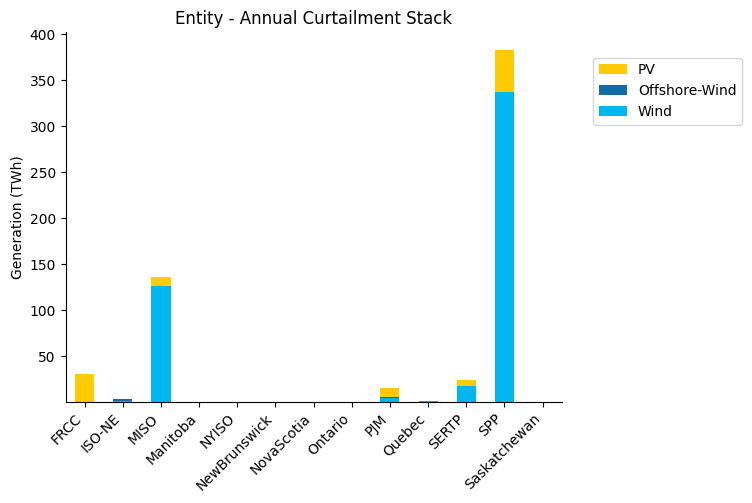

In [9]:
qp.plot_annual_entity_curtailment_stack(curt_entity)

# Facet Plots

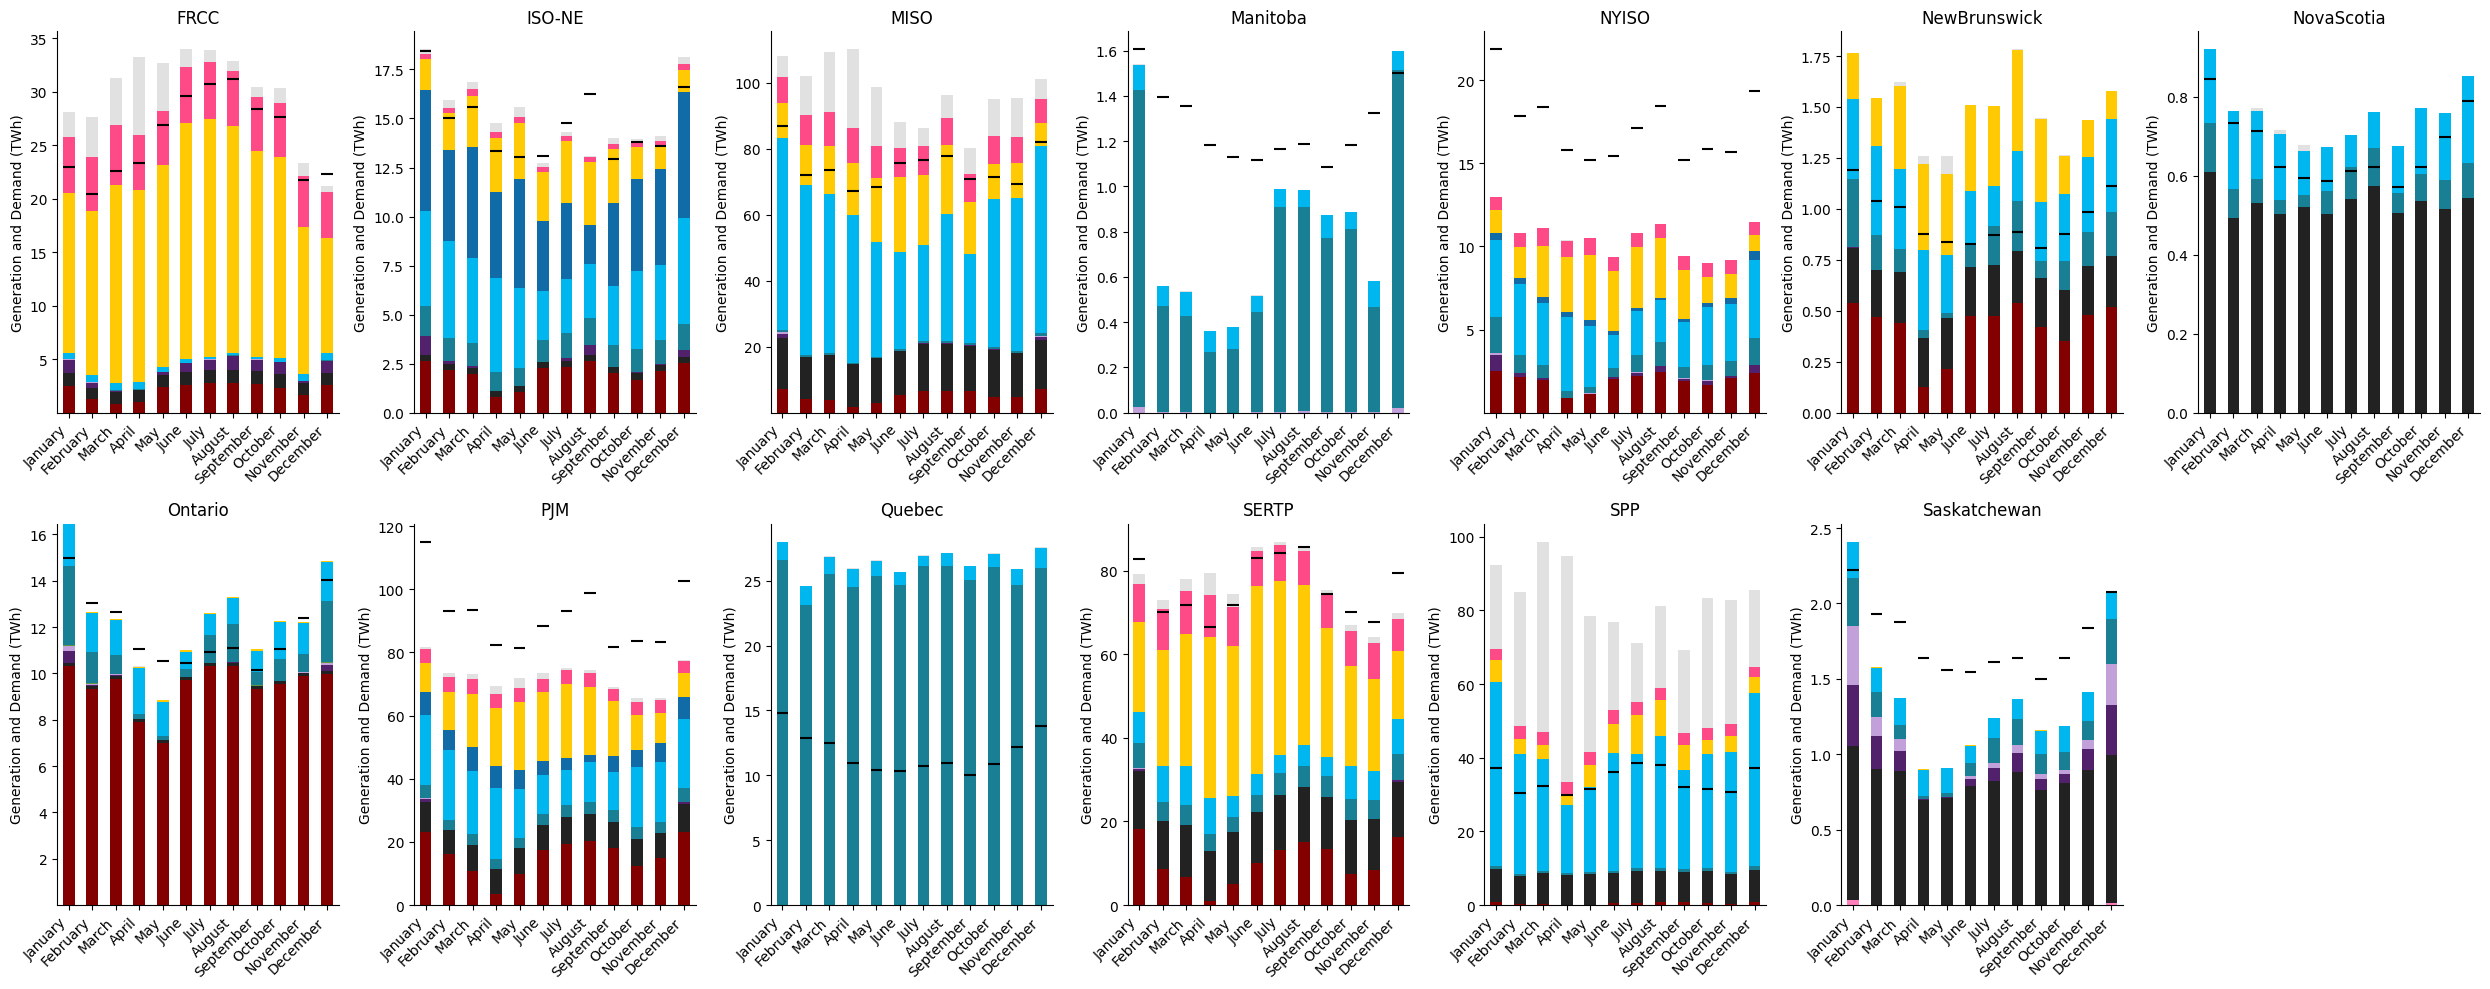

In [10]:
fig, axs = plt.subplots(2,7, figsize=(25,10))

zones = df.columns.get_level_values(0).unique()
num_zones = len(zones)

axs = qp.trim_axs(axs, num_zones)
i = 0
for ax in axs.reshape(-1)[0:num_zones]:
    
    if i < num_zones:
        zone = zones[i]
        ax = qp.plot_monthly_system_dispatch_stack(df[[zone]], ax)
        ax.set_title(f"{zone}")
        ax.get_legend().remove()

        i = i + 1


#fig.suptitle("Monthly Dispatch")
plt.tight_layout()
    

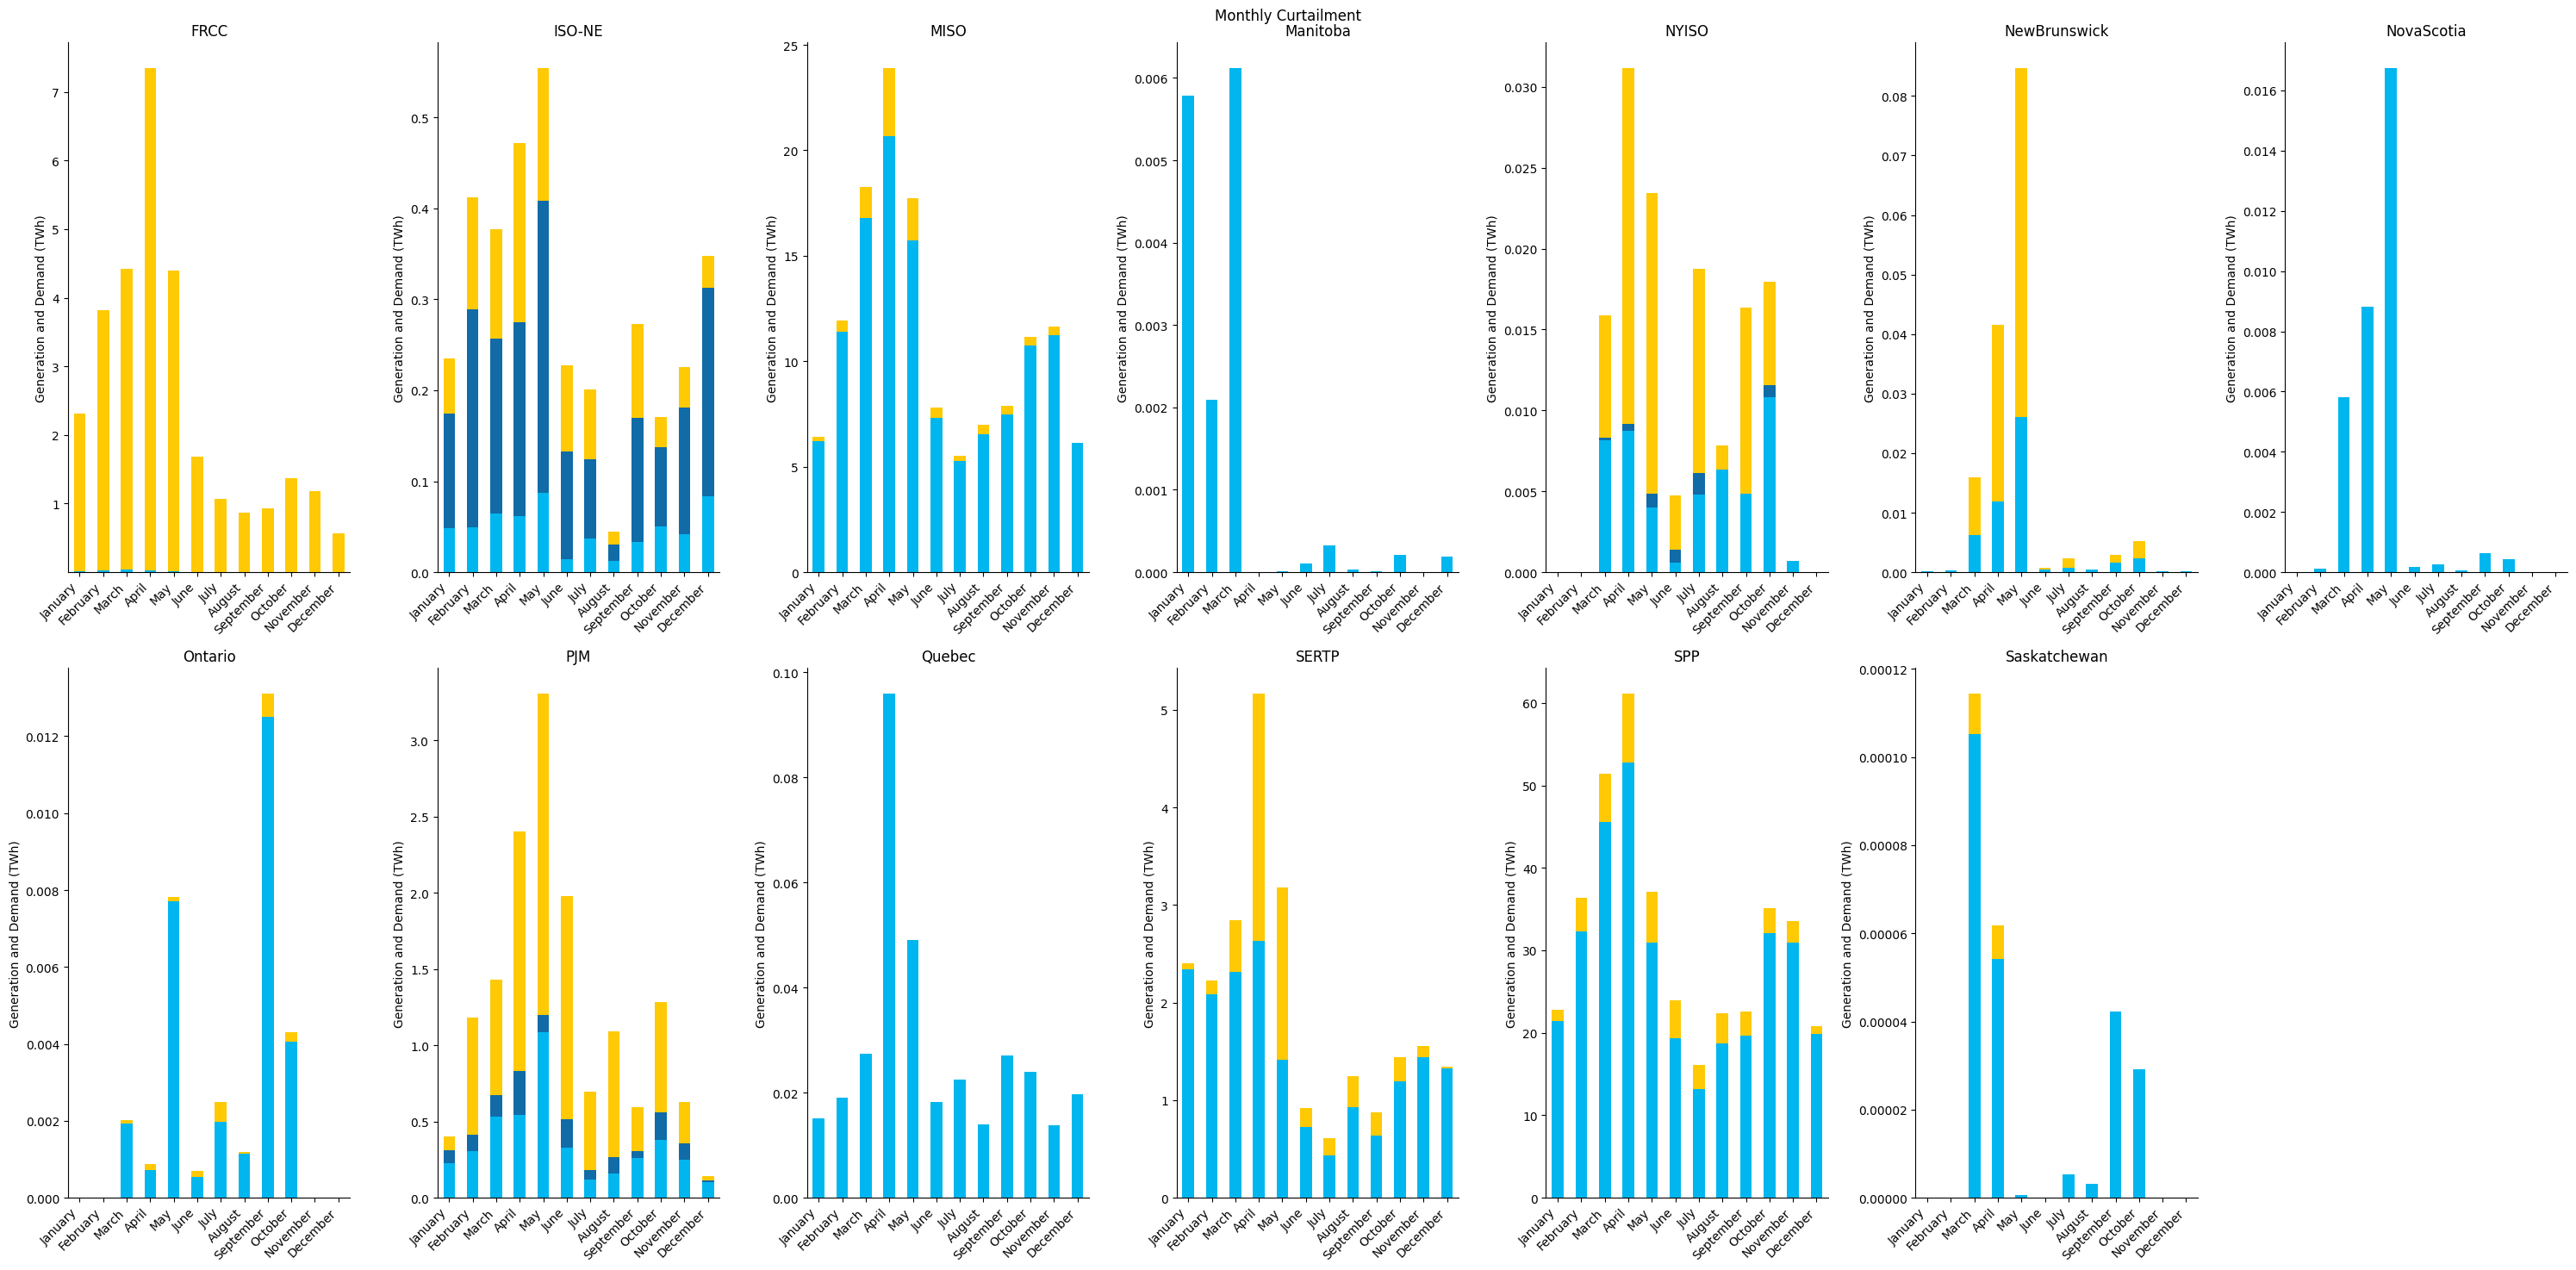

In [11]:

fig, axs = plt.subplots(2,7, figsize=(30,15))

zones = curt_entity.columns.get_level_values(0).unique()
num_zones = len(zones)

axs = qp.trim_axs(axs, num_zones)
i = 0
for ax in axs.reshape(-1)[0:num_zones]:
    
    if i < num_zones:
        zone = zones[i]
        ax = qp.plot_monthly_system_dispatch_stack(curt_entity[[zone]], ax)
        ax.set_title(f"{zone}")
        ax.get_legend().remove()

        i = i + 1


fig.suptitle("Monthly Curtailment")
plt.tight_layout()